<a href="https://colab.research.google.com/github/chrishg23-jpg/HES-benchmark/blob/main/Particles005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


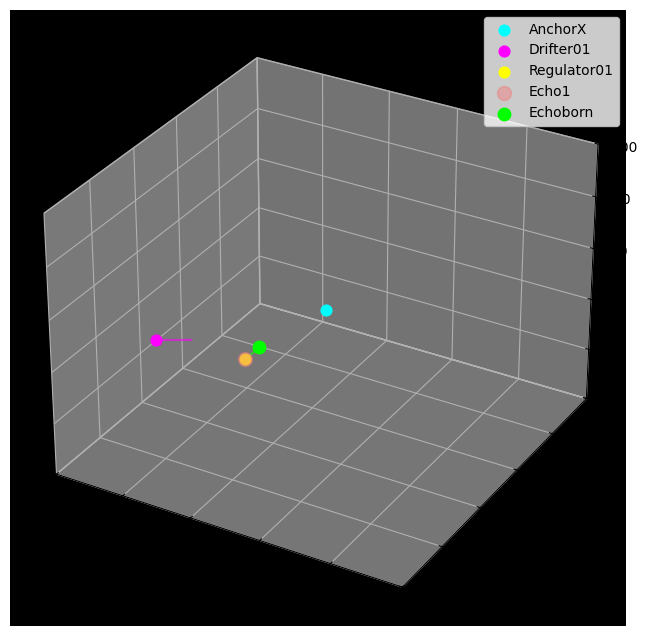

In [4]:
# 📦 Imports
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import numpy as np
from IPython.display import HTML

# 🛠 FFmpeg install (run once if needed)
!apt-get install ffmpeg -y

# 🧬 Particle system setup
class Particle:
    def __init__(self, id, position, velocity, color):
        self.id = id
        self.position = np.array(position, dtype=float)
        self.velocity = np.array(velocity, dtype=float)
        self.color = color
        self.trail = [self.position.copy()]
        self.memory = []

particles = {
    "AnchorX": Particle("AnchorX", [50, 50, 50], [0, 0, 0], "cyan"),
    "Drifter01": Particle("Drifter01", [20, 30, 40], [0.6, 0.2, 0.1], "magenta"),
    "Regulator01": Particle("Regulator01", [35, 35, 35], [0, 0, 0], "yellow")
}

collapse_echoes = []
echoborn = None
regulator_active = True

# 🌀 Collapse logic
def check_collapse():
    global regulator_active
    drifter = particles["Drifter01"]
    regulator = particles["Regulator01"]
    if not regulator_active:
        return
    dist = np.linalg.norm(drifter.position - regulator.position)
    if dist < 15:
        drifter.velocity *= -0.5
        regulator_active = False
        echo = {
            "location": regulator.position.copy(),
            "triggered_by": "Drifter01"
        }
        collapse_echoes.append(echo)
        drifter.memory.append(echo)

# 🧠 Echo response
def respond_to_echoes():
    drifter = particles["Drifter01"]
    for echo in collapse_echoes:
        dist = np.linalg.norm(drifter.position - echo["location"])
        if dist < 10:
            drifter.velocity += 0.1

# 🌱 Spawn Echoborn
def spawn_echoborn():
    global echoborn
    if collapse_echoes and echoborn is None:
        loc = collapse_echoes[0]["location"]
        echoborn = Particle("Echoborn", loc, [0.2, -0.1, 0.3], "lime")

# 🎥 Animation setup
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

def update(frame):
    ax.cla()
    ax.set_facecolor('black')
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.set_zlim(0, 100)

    # Update particles
    for p in particles.values():
        p.position += p.velocity
        p.trail.append(p.position.copy())

    check_collapse()
    respond_to_echoes()
    spawn_echoborn()

    # Plot particles and trails
    for p in particles.values():
        x, y, z = p.position
        ax.scatter(x, y, z, color=p.color, s=60, label=p.id)
        trail = np.array(p.trail)
        if len(trail) > 1:
            ax.plot(trail[:,0], trail[:,1], trail[:,2], color=p.color, alpha=0.6)

    # Plot echoes
    for i, echo in enumerate(collapse_echoes):
        x, y, z = echo["location"]
        ax.scatter(x, y, z, color='lightcoral', s=100, alpha=0.5, label=f"Echo{i+1}")

    # Plot Echoborn
    if echoborn:
        echoborn.position += echoborn.velocity
        echoborn.trail.append(echoborn.position.copy())
        x, y, z = echoborn.position
        ax.scatter(x, y, z, color=echoborn.color, s=80, label="Echoborn")
        trail = np.array(echoborn.trail)
        if len(trail) > 1:
            ax.plot(trail[:,0], trail[:,1], trail[:,2], color=echoborn.color, alpha=0.6)

    ax.legend(loc='upper right')

# 🎬 Save and display animation
anim = FuncAnimation(fig, update, frames=30, interval=500)
HTML(anim.to_html5_video())

